In [64]:
from IPython.display import Image

# Questions

**For more information about the question please click the provided links.**

## Easy

***

### LinkedIn | Data Science Skills

[Question](https://datalemur.com/questions/matching-skills): <br>

Given a table of candidates and their skills, you're tasked with finding the candidates best suited for an open Data Science job. You want to find candidates who are proficient in Python, Tableau, and PostgreSQL.

Write a query to list the candidates who possess all of the required skills for the job. Sort the output by candidate ID in ascending order.



```sql
SELECT candidate_id
FROM candidates
WHERE skill in ('Python','Tableau','PostgreSQL')
GROUP BY candidate_id
HAVING COUNT(*) = 3
ORDER BY 1 ASC; 
```

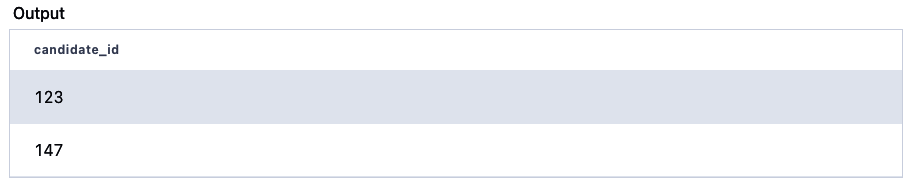

In [75]:
Image(filename='./resources/1.png')

***

### Facebook | Page With No Likes

[Question](https://datalemur.com/questions/sql-page-with-no-likes): <br>
Assume you're given two tables containing data about Facebook Pages and their respective likes (as in "Like a Facebook Page").

Write a query to return the IDs of the Facebook pages that have zero likes. The output should be sorted in ascending order based on the page IDs.

```sql
SELECT 
  pages.page_id
FROM 
    pages 
    LEFT JOIN 
    page_likes 
    ON pages.page_id = page_likes.page_id
GROUP BY 1
HAVING COUNT(page_likes.user_id) = 0
ORDER BY 1;
```

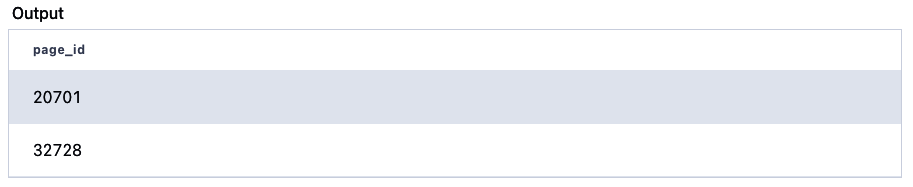

In [76]:
Image(filename='./resources/2.png')

***

### New York Times | Laptop vs. Mobile Viewership

[Question](https://datalemur.com/questions/laptop-mobile-viewership): <br>
Assume you're given the table on user viewership categorised by device type where the three types are laptop, tablet, and phone.

Write a query that calculates the total viewership for laptops and mobile devices where mobile is defined as the sum of tablet and phone viewership. Output the total viewership for laptops as laptop_reviews and the total viewership for mobile devices as mobile_views.

```sql
SELECT 
  SUM(CASE
    WHEN device_type = 'laptop' THEN 1
    ELSE 0
    END) AS "laptop_views",
  SUM(CASE
    WHEN device_type IN ('phone','tablet') THEN 1
    ELSE 0
    END) AS "mobile_views"
FROM viewership;
```

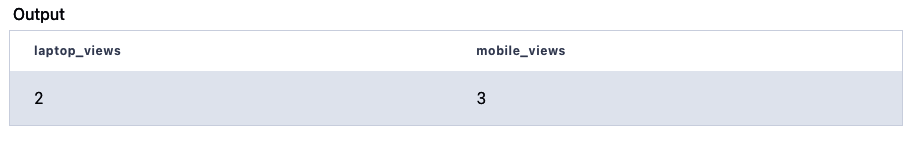

In [67]:
Image(filename='./resources/3.png')

***

### Amazon | Average Review Ratings

[Question](https://datalemur.com/questions/sql-avg-review-ratings): <br>
Given the reviews table, write a query to retrieve the average star rating for each product, grouped by month. The output should display the month as a numerical value, product ID, and average star rating rounded to two decimal places. Sort the output first by month and then by product ID.

```sql
SELECT 
  EXTRACT(MONTH FROM submit_date) as "mth", 
  product_id as "product",
  ROUND(AVG(stars),2) as "avg_stars"
FROM reviews
GROUP BY 
  EXTRACT(MONTH FROM submit_date),
  product_id
ORDER BY
  "mth" ASC,
  "product" ASC
```

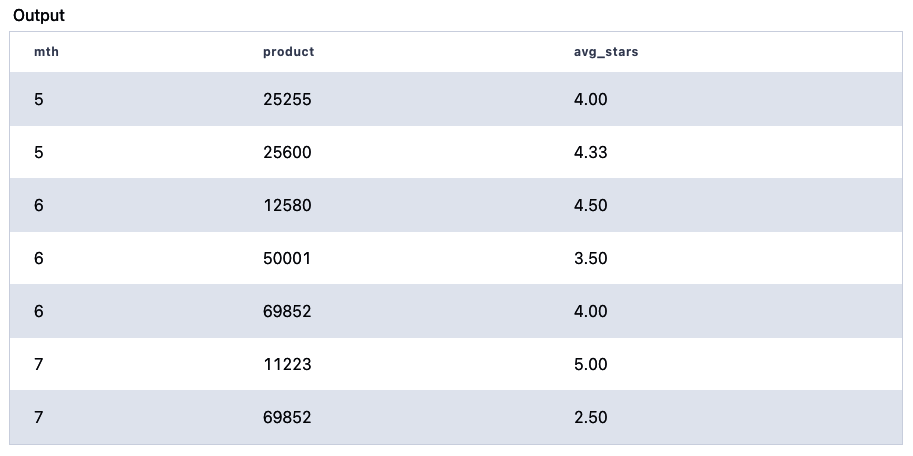

In [68]:
Image(filename='./resources/4.png')

***

### JPMorgan Chase | Cards Issued Difference

[Question](https://datalemur.com/questions/cards-issued-difference): <br>
Your team at JPMorgan Chase is preparing to launch a new credit card, and to gain some insights, you're analyzing how many credit cards were issued each month.

Write a query that outputs the name of each credit card and the difference in the number of issued cards between the month with the highest issuance cards and the lowest issuance. Arrange the results based on the largest disparity.

```sql
SELECT 
    card_name, 
    MAX(issued_amount)-MIN(issued_amount) "difference"
FROM monthly_cards_issued
GROUP BY card_name
ORDER BY 2 DESC;
```

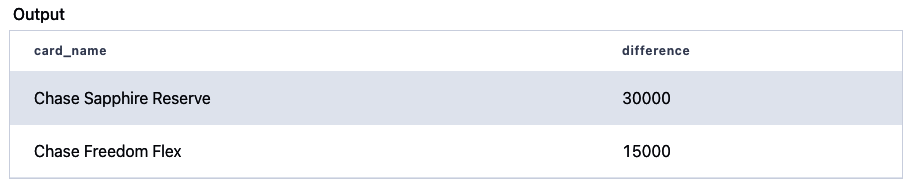

In [69]:
Image(filename='./resources/5.png')

***

### CVS Health | Pharmacy Analytics (Part 1)

[Question](https://datalemur.com/questions/top-profitable-drugs): <br>
CVS Health is trying to better understand its pharmacy sales, and how well different products are selling. Each drug can only be produced by one manufacturer.

Write a query to find the top 3 most profitable drugs sold, and how much profit they made. Assume that there are no ties in the profits. Display the result from the highest to the lowest total profit.

Definition:
- cogs stands for Cost of Goods Sold which is the direct cost associated with producing the drug.
- Total Profit = Total Sales - Cost of Goods Sold

```sql
SELECT 
    drug, 
    (total_sales-cogs) as "total_profit"
FROM pharmacy_sales
ORDER BY "total_profit" DESC
LIMIT 3;
```

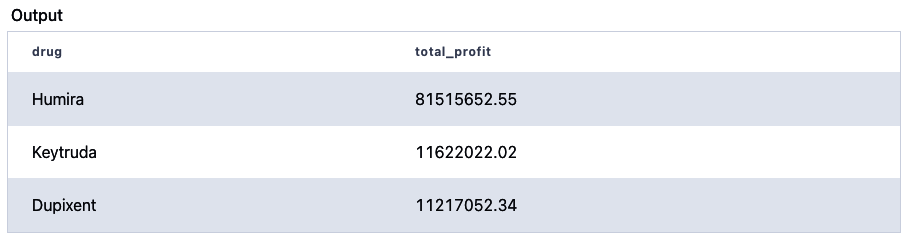

In [70]:
Image(filename='./resources/6.png')

***

### Tesla | Unfinished Parts

[Question](https://datalemur.com/questions/tesla-unfinished-parts): <br>
Tesla is investigating production bottlenecks and they need your help to extract the relevant data. Write a query to determine which parts have begun the assembly process but are not yet finished.

Assumptions:
- parts_assembly table contains all parts currently in production, each at varying stages of the assembly process.
- An unfinished part is one that lacks a finish_date.

```sql
SELECT 
    part,
    assembly_step
FROM parts_assembly
WHERE finish_date IS NULL;
```

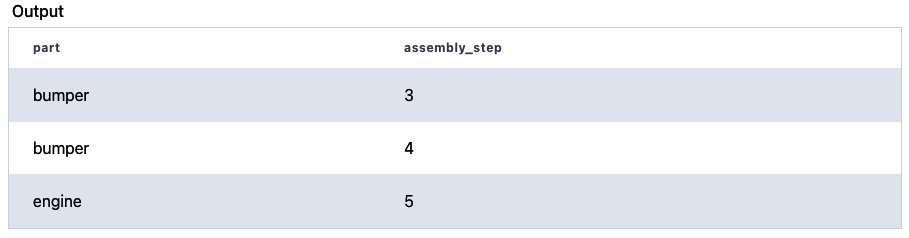

In [71]:
Image(filename='./resources/7.png')

***

### TikTok | Second Day Confirmation

[Question](https://datalemur.com/questions/second-day-confirmation): <br>
Assume you're given tables with information about TikTok user sign-ups and confirmations through email and text. New users on TikTok sign up using their email addresses, and upon sign-up, each user receives a text message confirmation to activate their account.

Write a query to display the user IDs of those who did not confirm their sign-up on the first day, but confirmed on the second day.

Definition:
- action_date refers to the date when users activated their accounts and confirmed their sign-up through text messages.

```sql
SELECT 
    user_id
FROM 
    emails 
    JOIN 
    texts 
    ON emails.email_id = texts.email_id
WHERE 
    signup_action = 'Confirmed' AND 
    EXTRACT(DAY FROM action_date-signup_date) = 1;
```

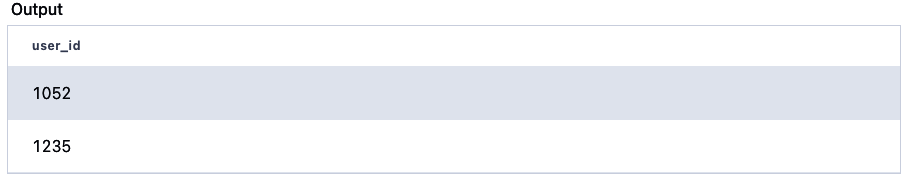

In [72]:
Image(filename='./resources/8.png')

***

### Facebook | Page With No Likes

[Question](https://datalemur.com/questions/sql-average-post-hiatus-1): <br>
Given a table of Facebook posts, for each user who posted at least twice in 2021, write a query to find the number of days between each user’s first post of the year and last post of the year in the year 2021. Output the user and number of the days between each user's first and last post.

```sql
SELECT 
    user_id,
    EXTRACT(DAY FROM MAX(post_date)-MIN(post_date)) AS days_between
FROM posts
WHERE EXTRACT(YEAR FROM post_date) = 2021
GROUP BY user_id
HAVING COUNT(*)>=2;
```

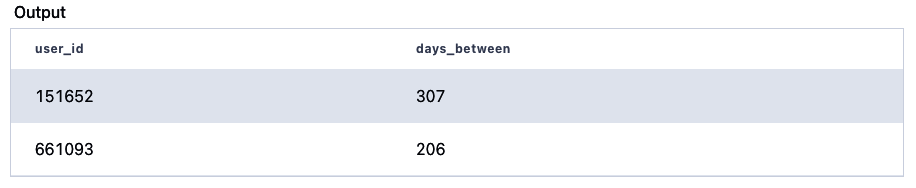

In [77]:
Image(filename='./resources/9.png')

***

### Robinhood | Cities With Completed trades

[Question](https://datalemur.com/questions/completed-trades): <br>
Assume you're given the tables containing completed trade orders and user details in a Robinhood trading system.

Write a query to retrieve the top three cities that have the highest number of completed trade orders listed in descending order. Output the city name and the corresponding number of completed trade orders.

```sql
SELECT 
    city,
    COUNT(*) "total_orders"
FROM 
    trades t 
    INNER JOIN 
    users u 
    ON t.user_id = u.user_id
WHERE status = 'Completed'
GROUP BY city
ORDER BY "total_orders" DESC
LIMIT 3;
```

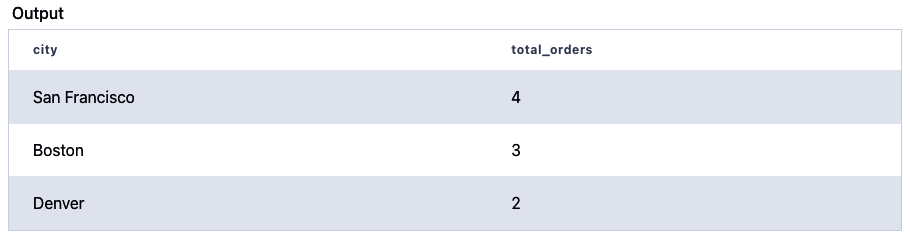

In [74]:
Image(filename='./resources/10.png')

***